Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [3]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.model_selection import cross_val_score

In [5]:
train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [6]:
train

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [30]:
X_train = train.drop(['Unnamed: 0','species'], axis=1) #axis=1 - передаем индексы колонок
Y_train = train.species
X_test = test.drop(['Unnamed: 0','species'], axis=1) #axis=1 - передаем индексы колонок
Y_test = test.species

In [31]:
max_depth_values = range(1,100)

In [32]:
scores_data = pd.DataFrame()

In [40]:
rs = np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state = rs)
    clf.fit(X_train,Y_train) 
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    mean_cross_val_score = int(cross_val_score(clf, X_train, Y_train, cv=5).mean())
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],  
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'], 
                          var_name = 'species', value_name = 'score') # изменение формата дф

<AxesSubplot:xlabel='max_depth', ylabel='score'>

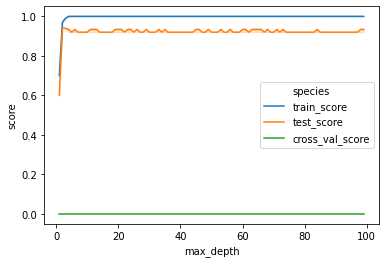

In [47]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='species')